In [874]:
import pandas as pd
import os
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [875]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/Users/ajinkya.parkar@ibm.com/Documents/deep/House price prediction/data/train.csv")
data_test = pd.read_csv("/Users/ajinkya.parkar@ibm.com/Documents/deep/House price prediction/data/test.csv")

In [876]:
for missingCols in data.columns[data.isnull().any()]:
    print(missingCols)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [877]:
data[["LotFrontage","Alley","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]]



,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [878]:
data = data.fillna("NA")
data_test = data_test.fillna("NA")


# Convert to category codes for columns with datatype object

In [879]:
for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes
        
for col_name in data_test.columns:
    if(data_test[col_name].dtype == 'object'):
        data_test[col_name]= data_test[col_name].astype('category')
        data_test[col_name] = data_test[col_name].cat.codes        

In [880]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_dataTest = scaler.fit_transform(data_test)

# Chi square test

In [881]:
arrayTrain = data.drop(columns=["ExterQual","BsmtQual","KitchenQual"]).values
X = arrayTrain[:,0:array.shape[1]-1]
Y = arrayTrain[:,array.shape[1]-1]

arrayTest = data_test.drop(columns=["ExterQual","BsmtQual","KitchenQual"]).values
test_X = arrayTest[:,0:array.shape[1]-1]
#test_y = array[:,array.shape[1]-1]


In [882]:
def scaleData(X_data,y_data,scaler=MinMaxScaler(feature_range=(0, 1))):
    #scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(X_data)
    scaled_dataOP = scaler.fit_transform(y_data)
    return scaled_data,scaled_dataOP

In [883]:
from sklearn.metrics import mean_squared_error

In [884]:
test = SelectKBest(score_func=chi2,k= array.shape[1]-1)
fitChi = test.fit(X, Y)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(data.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
bestFeatureCombinationCount = 0
bestFeatureCombinationAccuracy = 1
for i in range(5,len(data.columns)-1):
    
    topFeatures = featureScores.nlargest(i,'Score').pivot(index='Score', columns='Specs', values='Score')
    intersection_cols = data.columns & topFeatures.columns
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_X,train_Y = scaleData(data[intersection_cols],data.values[:,80].reshape(1460,1),scaler)
    numpy.set_printoptions(precision=3)
    reg = LinearRegression().fit(train_X, train_Y)
    print(mean_squared_error(reg.predict(train_X),train_Y))
    if(mean_squared_error(reg.predict(train_X),train_Y) < bestFeatureCombinationAccuracy):
        bestFeatureCombinationCount = i
        print("i = ",i)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0.00935873063729
i =  5
0.00916773146436
i =  6
0.0088484602678
i =  7
0.0080499173906
i =  8
0.00673174609979
i =  9
0.00604272474213
i =  10
0.00597810286336
i =  11
0.00586028174127
i =  12
0.00385589646949
i =  13
0.00370467050953
i =  14
0.00370079638982
i =  15
0.00361794111908
i =  16
0.00361736228506
i =  17
0.00360873967009
i =  18
0.00359419458537
i =  19
0.00357407609831
i =  20
0.00344806394112
i =  21
0.00334692637122
i =  22
0.00333900931963
i =  23
0.0033384270523
i =  24
0.00315596490194
i =  25
0.00309227148676
i =  26
0.00303505834273
i =  27
0.00295189741755
i =  28
0.00241731126966
i =  29
0.00241310347785
i =  30
0.0023198173984
i =  31
0.0022842377794
i =  32
0.00228262353056
i =  33
0.00228142041679
i =  34
0.00227669003417
i =  35
0.00227315786555
i =  36
0.00226956041392
i =  37
0.00226713990129
i =  38
0.00225509630099
i =  39
0.00222228146557
i =  40
0.00222107211326
i =  41
0.00221791131455
i =  42
0.00211781567611
i =  43
0.00211510454009
i =  44
0.00209742

In [885]:
bestFeatureCombinationCount

79

# select best features with minimum rms error

In [886]:
topFeatures = featureScores.nlargest(50,'Score').pivot(index='Score', columns='Specs', values='Score')
intersection_cols = data.columns & topFeatures.columns
scaler = MinMaxScaler(feature_range=(0, 1))
train_X,train_Y = scaleData(data[intersection_cols],data.values[:,data.shape[1]-1].reshape(data.shape[0],1),scaler)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Train linear regression model

In [887]:
reg = LinearRegression().fit(train_X, train_Y)

# predict and inverse the results for training set

In [888]:
scaler.inverse_transform(reg.predict(train_X))

array([[ 217890.165],
       [ 203093.065],
       [ 219747.739],
       ..., 
       [ 228462.059],
       [ 150659.943],
       [ 153446.385]])

# test data prediction

In [889]:
topFeatures = featureScores.nlargest(50,'Score').pivot(index='Score', columns='Specs', values='Score')
intersection_cols = data_test.columns & topFeatures.columns
scalerTest = MinMaxScaler(feature_range=(0, 1))
test_X,test_Y = scaleData(data_test[intersection_cols],data_test.values[:,data_test.shape[1]-1].reshape(data_test.shape[0],1),scalerTest)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [890]:
reg.predict(test_X)

array([[ 0.128],
       [ 0.219],
       [ 0.212],
       ..., 
       [ 0.222],
       [ 0.137],
       [ 0.314]])

In [891]:
scaler.inverse_transform(reg.predict(test_X))

array([[ 126780.001],
       [ 192638.584],
       [ 187615.151],
       ..., 
       [ 194940.912],
       [ 133440.037],
       [ 260890.837]])

In [421]:
'''
topFeatures = featureScores.nlargest(bestFeatureCombinationCount,'Score').pivot(index='Score', columns='Specs', values='Score')
intersection_cols = data.columns & topFeatures.columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[intersection_cols])
scaled_dataOP = scaler.fit_transform(data.values[:,80].reshape(1460,1))
array = scaled_data
X = scaled_data
Y = scaled_dataOP
numpy.set_printoptions(precision=3)
reg = LinearRegression().fit(X, Y)

if(reg.score(X, Y) > bestFeatureCombinationAccuracy):
    bestFeatureCombinationCount = i
print(reg.score(X, Y))
'''

#topFeatures

"\ntopFeatures = featureScores.nlargest(bestFeatureCombinationCount,'Score').pivot(index='Score', columns='Specs', values='Score')\nintersection_cols = data.columns & topFeatures.columns\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled_data = scaler.fit_transform(data[intersection_cols])\nscaled_dataOP = scaler.fit_transform(data.values[:,80].reshape(1460,1))\narray = scaled_data\nX = scaled_data\nY = scaled_dataOP\nnumpy.set_printoptions(precision=3)\nreg = LinearRegression().fit(X, Y)\n\nif(reg.score(X, Y) > bestFeatureCombinationAccuracy):\n    bestFeatureCombinationCount = i\nprint(reg.score(X, Y))\n"

# Train using features from heatmap test and linear regression model

In [173]:
def getTrainTest(filteredCols):
    
    X = np.array(filteredCols)
    y = np.array(data["SalePrice"])
    return X,y

In [174]:
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)


0.85014566442755846

In [175]:
#scaler.inverse_transform(scaled_data[startRange:endRange])
scaler.inverse_transform(reg.predict(X[:10]))

array([[ 217448.192],
       [ 203339.787],
       [ 219887.495],
       [ 172266.136],
       [ 290956.935],
       [ 167167.772],
       [ 285572.887],
       [ 233292.677],
       [ 163717.586],
       [ 113898.656]])

In [176]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,36,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,128,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,89,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,51,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,62,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,39,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,104,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,87,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,31,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,84,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,55,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,221,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,86,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000
5,6,50,3,56,14115,1,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,3,0,3,4,5,2,4,4,2,732,6,0,64,796,1,0,1,5,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,3,1,79,3,2,480,5,5,2,40,30,0,320,0,0,3,2,3,700,10,2009,8,4,143000
6,7,20,3,46,10084,1,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,4,123,2,4,2,0,4,0,2,1369,6,0,317,1686,1,0,1,5,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,1,90,2,2,636,5,5,2,255,57,0,0,0,0,3,4,1,0,8,2007,8,4,307000
7,8,60,3,110,10382,1,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,4,157,3,4,1,2,4,2,0,859,1,32,216,1107,1,0,1,5,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,5,1,59,2,2,484,5,5,2,235,204,228,0,0,0,3,4,3,350,11,2009,8,4,200000
8,9,50,4,22,6120,1,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,3,0,3,4,0,4,4,4,6,0,6,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,5,5,19,3,2,468,1,5,2,90,0,205,0,0,0,3,4,1,0,4,2008,8,0,129900
9,10,190,3,21,7420,1,1,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,3,0,3,4,0,4,4,4,2,851,6,0,140,991,1,0,1,5,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,5,1,27,2,1,205,2,5,2,0,4,0,0,0,0,3,4,1,0,1,2008,8,4,118000


#aLotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea

# filter columns using heatmap


In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

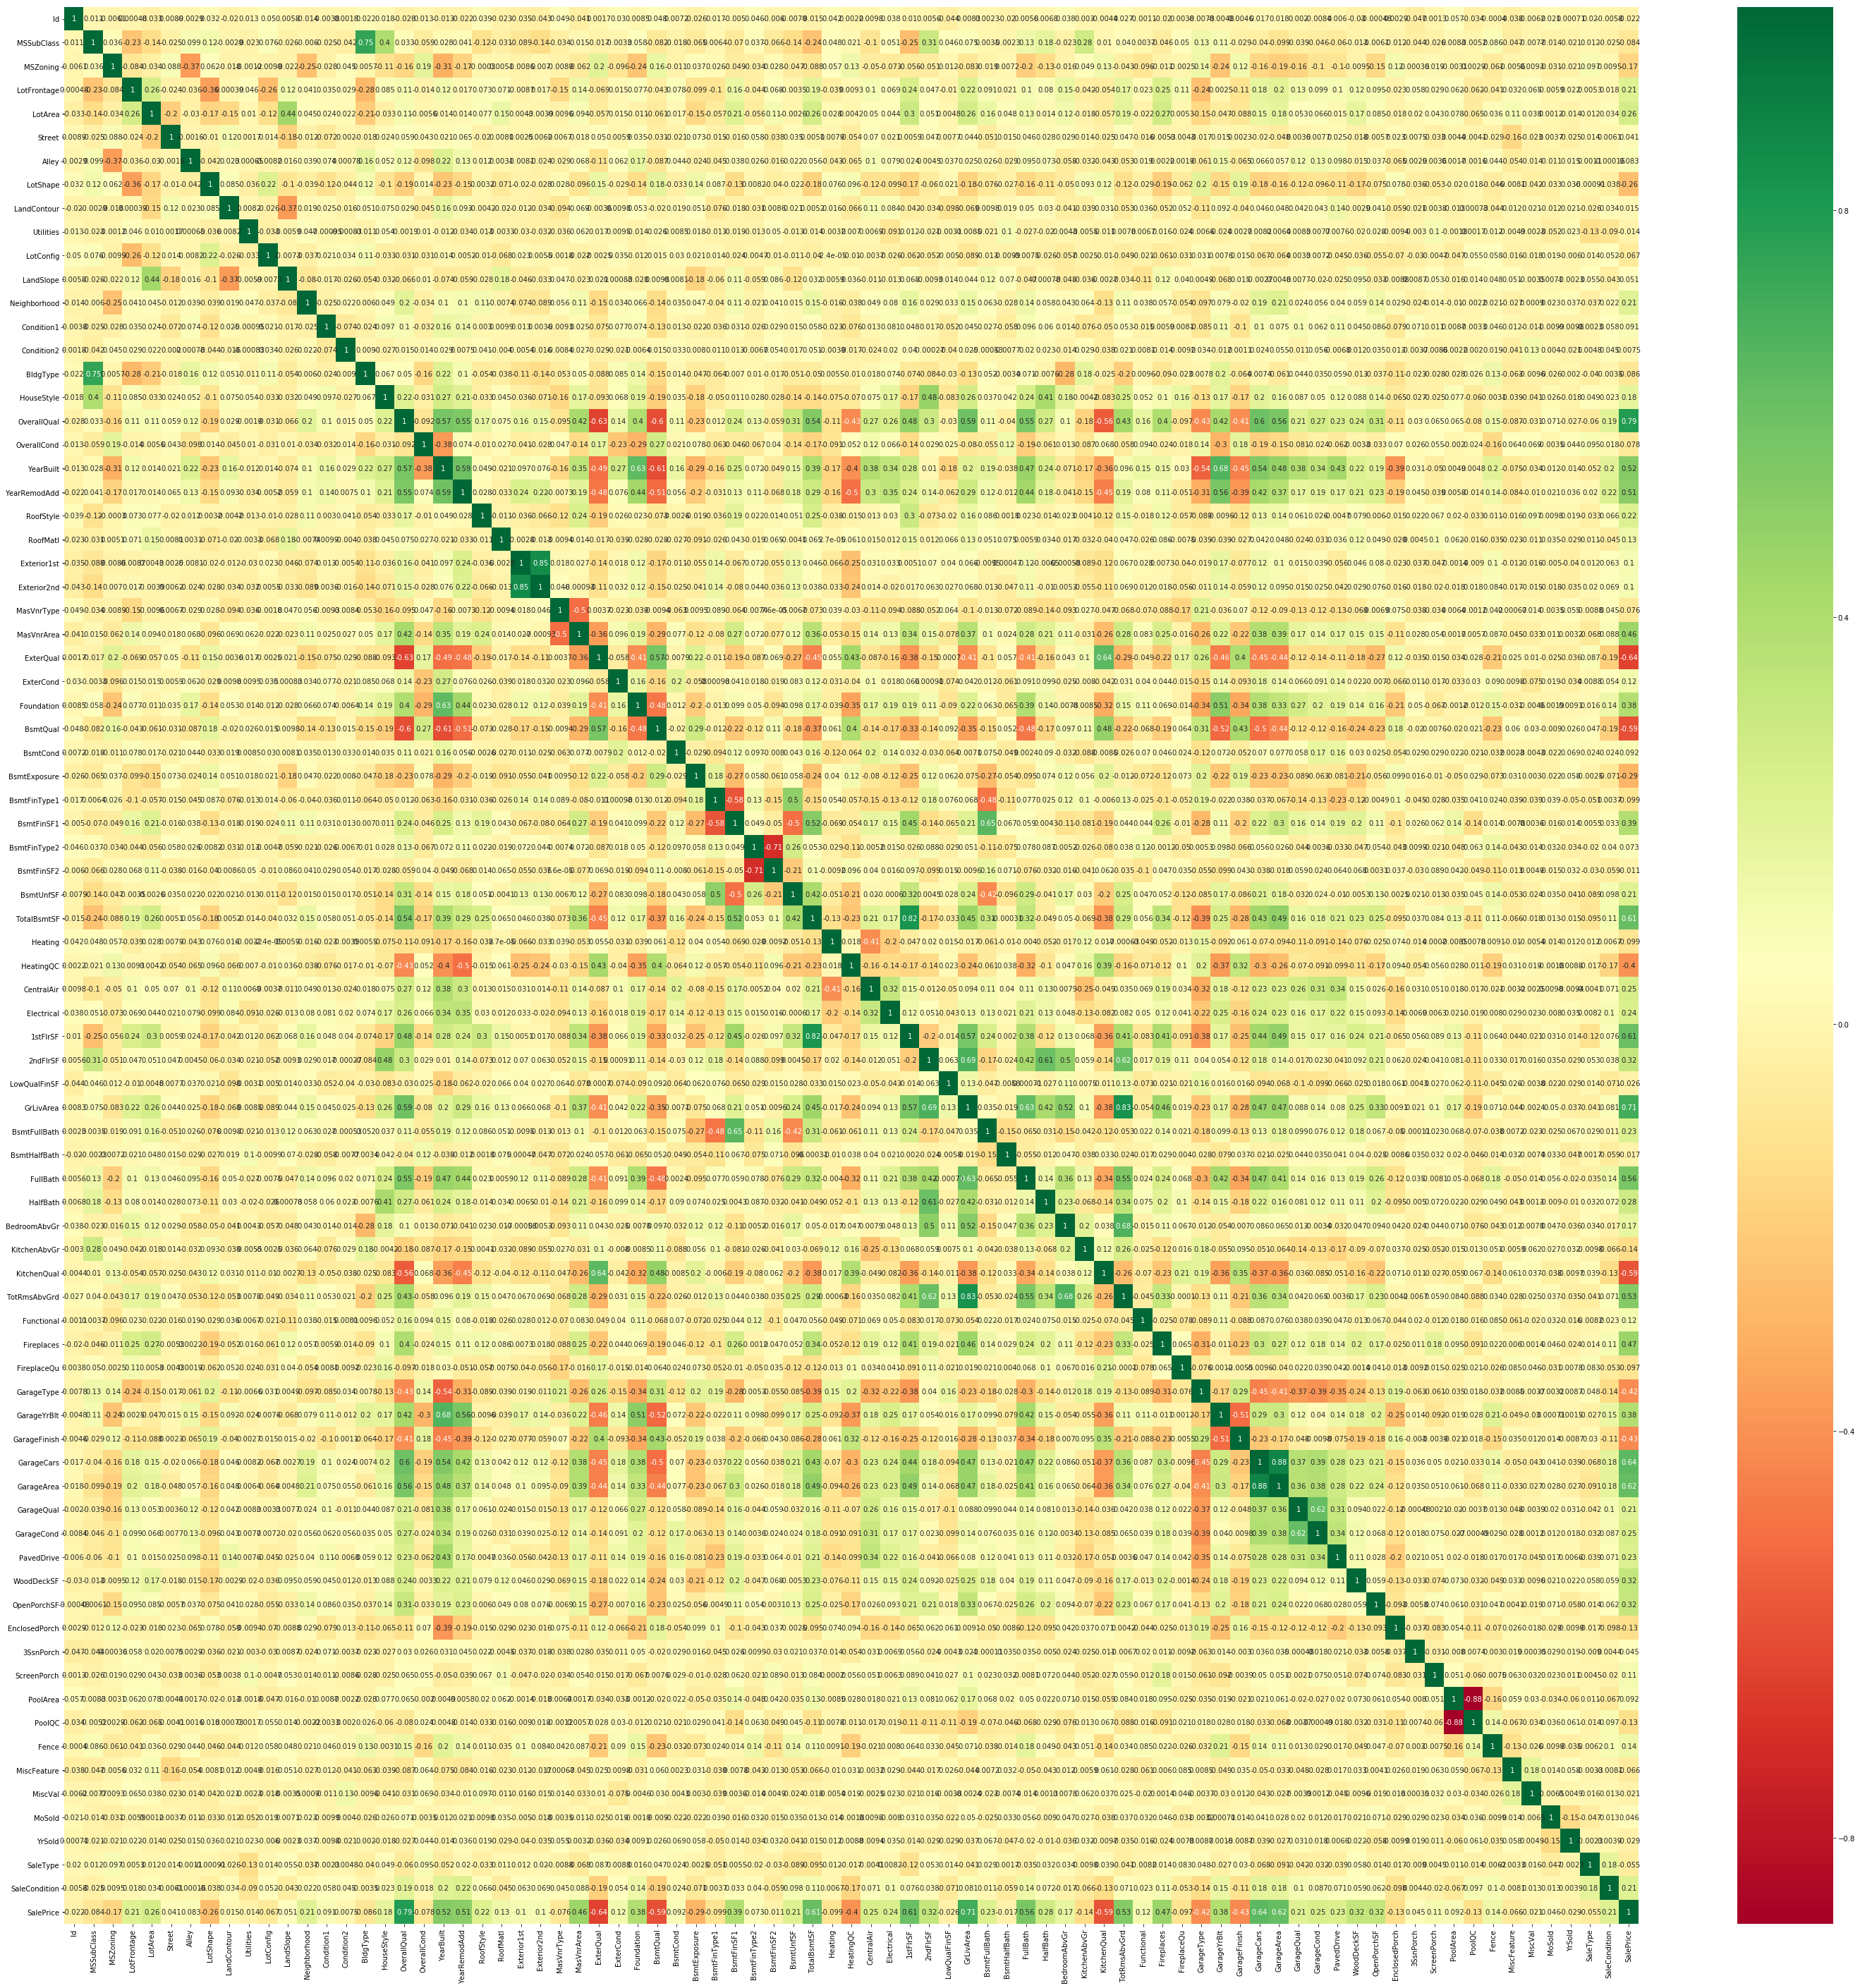

In [178]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [305]:
import numpy as np


In [374]:
train_X ,train_y = scaleData(data[["OverallQual","TotalBsmtSF","1stFlrSF","GrLivArea","GarageCars","GarageArea","Fireplaces","FullBath","BsmtQual"]],data.values[:,80].reshape(1460,1))


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [375]:
reg = LinearRegression().fit(train_X, train_y)
reg.score(train_X, train_y)


0.77933742630926717

In [377]:
mean_squared_error(reg.predict(train_X),train_y)

0.0026838073030030995

In [382]:
reg.score(train_X, train_y)
reg.predict(train_X)

array([[ 0.234],
       [ 0.209],
       [ 0.257],
       ..., 
       [ 0.261],
       [ 0.107],
       [ 0.126]])

In [383]:
scaler.inverse_transform(reg.predict(train_X))

array([[ 203741.318],
       [ 185336.456],
       [ 219797.09 ],
       ..., 
       [ 223182.372],
       [ 111655.222],
       [ 125534.823]])

In [385]:
scaler.inverse_transform(train_y)

array([[ 208500.],
       [ 181500.],
       [ 223500.],
       ..., 
       [ 266500.],
       [ 142125.],
       [ 147500.]])